# Iris Specie Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species']=df['Species'].str.replace('Iris-','')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Analysis

<Axes: >

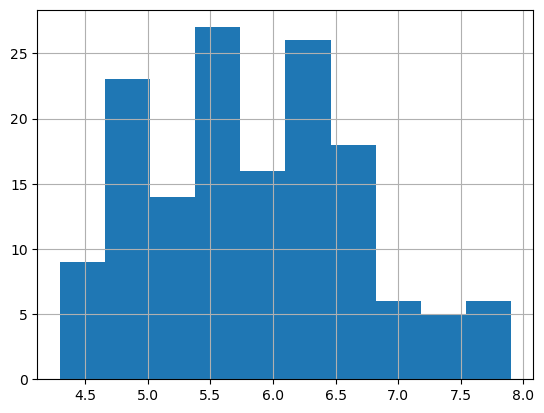

In [10]:
df['SepalLengthCm'].hist()

<Axes: >

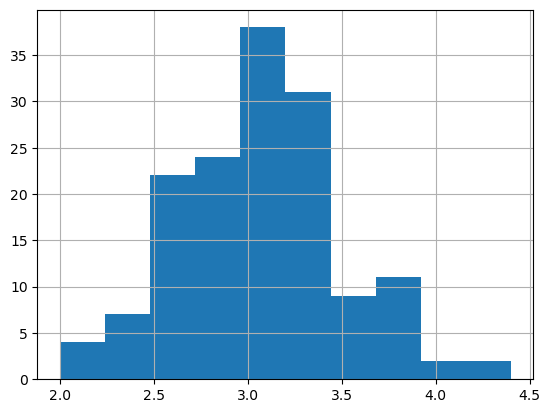

In [11]:
df['SepalWidthCm'].hist()

<Axes: >

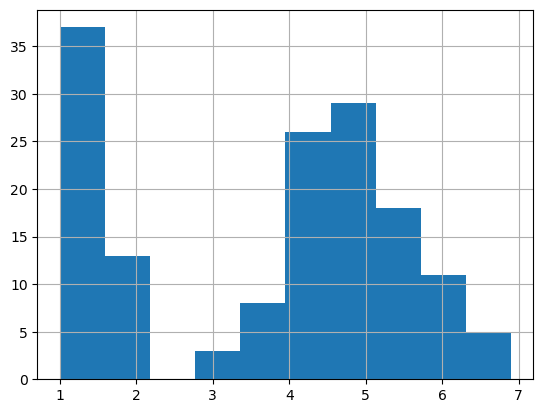

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

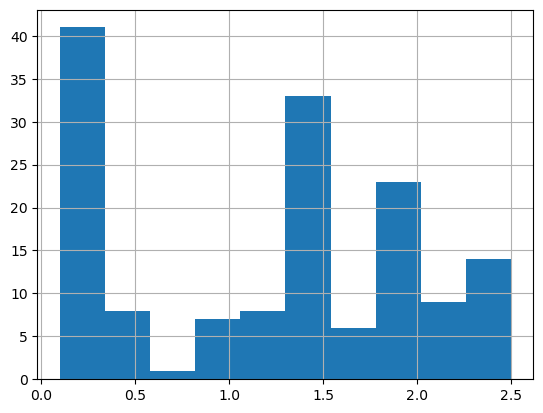

In [13]:
df['PetalWidthCm'].hist()

In [14]:
colors=['blue','orange','green']
species=['setosa','virginica','versicolor']

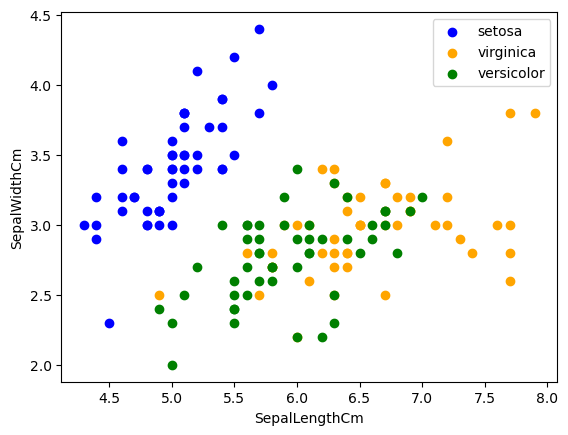

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

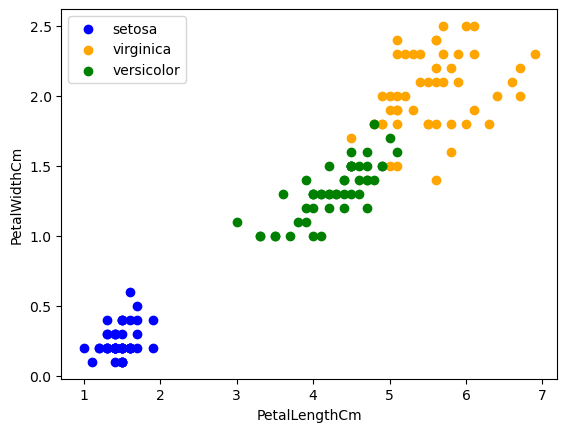

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

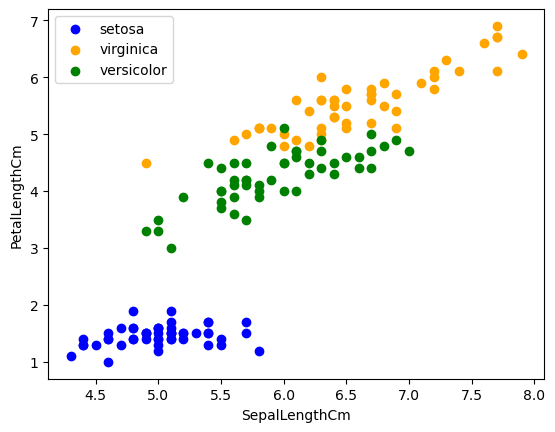

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

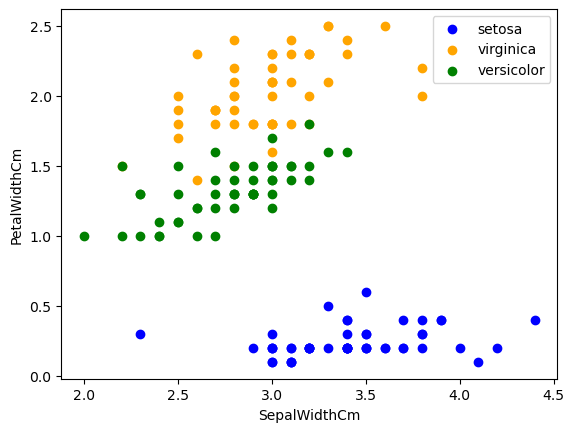

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

Correlation Matrix

In [19]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

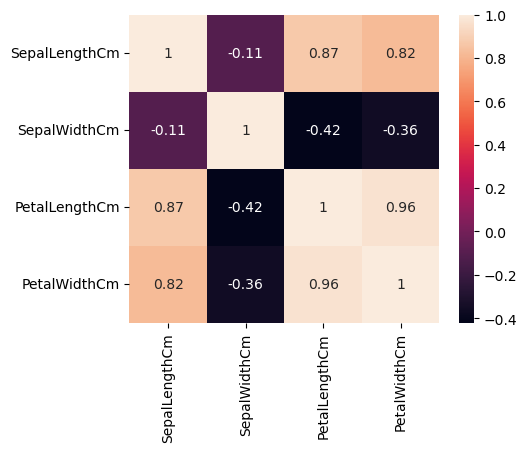

In [20]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

Label Encoder

In [21]:
'''from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df'''

"from sklearn import preprocessing\nle=preprocessing.LabelEncoder()\ndf['Species']=le.fit_transform(df['Species'])\ndf"

Model Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [24]:
#Logistic Regression
model=LogisticRegression()
model.fit(x_train.values,y_train.values)
print('Logistic Regression Accuracy:',model.score(x_test,y_test)*100)

Logistic Regression Accuracy: 93.33333333333333


In [25]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [26]:
#KNeighbors Classifier
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print('KNeighbors Accuracy:',model.score(x_test,y_test)*100)

KNeighbors Accuracy: 95.55555555555556


In [27]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [28]:
#Decision-tree Classifier
model=DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print('Decision-tree Accuracy:',model.score(x_test,y_test)*100)

Decision-tree Accuracy: 93.33333333333333


In [29]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [30]:
import pickle

In [31]:
filename="saved_model.sav"
pickle.dump(model,open(filename,"wb"))

In [32]:
load_model=pickle.load(open(filename,"rb"))

In [33]:
load_model.predict([[7.7,2.8,6.7,2]])

array(['virginica'], dtype=object)

In [34]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
92,5.8,2.6,4.0,1.2
21,5.1,3.7,1.5,0.4
146,6.3,2.5,5.0,1.9
56,6.3,3.3,4.7,1.6


In [35]:
load_model.predict([[5,2,3,1]])

array(['versicolor'], dtype=object)